In [19]:
import torchvision
import torch
import torch.nn as nn

In [20]:
dataset = torchvision.datasets.CIFAR10(root=".", train=True, transform=torchvision.transforms.ToTensor(), download=True)

Files already downloaded and verified


In [21]:
x_train, y_train = dataset.data, dataset.targets
print(x_train.shape)

(50000, 32, 32, 3)


In [22]:
print(len(set(y_train)))

10


In [23]:
device = 'cuda:0' if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [38]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(256 * 4 * 4, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 10)
)

model = model.to(device)
model.parameters

<bound method Module.parameters of Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=4096, 

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [26]:
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=100, shuffle=True)

In [36]:
test = torchvision.datasets.CIFAR10(root=".", train=False, transform=torchvision.transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=True, batch_size=100)

In [40]:
import numpy as np
train_losses = np.zeros(15)
for i in range(15):
    model.train()
    losses = []
    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    l = np.mean(losses)

    model.eval()
    test_loss = []
    for inp, out in test_loader:
        inp, out = inp.to(device), out.to(device)
        outp = model(inp)
        lo = criterion(outp, out)
        test_loss.append(lo.item())
    l2 = np.mean(test_loss)

    print(f"Epoch {i+1}/15: Train loss - {l:.4f}, Test loss - {l2:.4f}")

Epoch 1/15: Train loss - 1.7080, Test loss - 1.4179
Epoch 2/15: Train loss - 1.2762, Test loss - 1.1581
Epoch 3/15: Train loss - 1.0775, Test loss - 1.0279
Epoch 4/15: Train loss - 0.9400, Test loss - 0.8900
Epoch 5/15: Train loss - 0.8435, Test loss - 0.8633
Epoch 6/15: Train loss - 0.7658, Test loss - 0.8021
Epoch 7/15: Train loss - 0.7038, Test loss - 0.7647
Epoch 8/15: Train loss - 0.6429, Test loss - 0.7189
Epoch 9/15: Train loss - 0.5920, Test loss - 0.7065
Epoch 10/15: Train loss - 0.5411, Test loss - 0.6989
Epoch 11/15: Train loss - 0.4985, Test loss - 0.7158
Epoch 12/15: Train loss - 0.4570, Test loss - 0.7109
Epoch 13/15: Train loss - 0.4216, Test loss - 0.7083
Epoch 14/15: Train loss - 0.3862, Test loss - 0.7134
Epoch 15/15: Train loss - 0.3544, Test loss - 0.7282


In [29]:

print(test.data[603])

[[[126 117  99]
  [128 119  94]
  [127 116  97]
  ...
  [122 121 106]
  [121 121 106]
  [119 121 106]]

 [[130 116 100]
  [130 120  91]
  [127 117  92]
  ...
  [123 120 105]
  [123 121 105]
  [121 121 105]]

 [[132 117 102]
  [131 121 100]
  [128 119 102]
  ...
  [125 119 102]
  [125 121 103]
  [124 122 104]]

 ...

 [[110 110 100]
  [114 114 104]
  [118 115 106]
  ...
  [139 132 123]
  [135 128 122]
  [129 122 114]]

 [[111 110 100]
  [115 113 104]
  [118 115 106]
  ...
  [138 131 123]
  [140 133 127]
  [130 123 116]]

 [[114 110 100]
  [118 112 102]
  [119 112 103]
  ...
  [129 120 113]
  [133 125 118]
  [130 122 115]]]


Actual: tensor(4) Predicted: tensor(2, device='cuda:0')


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

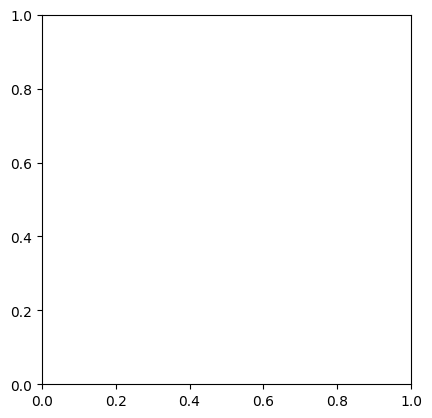

In [43]:
%matplotlib inline 
from matplotlib import pyplot as plt
inp, targ = next(iter(test_loader))
inp = inp.to(device)
out = model(inp)
_, prediction = torch.max(out, 1)
print("Actual: " + str(targ[0]) + " Predicted: " + str(prediction[0]))
plt.imshow(inp[0])
plt.show()